In [1]:
import pandas as pd
import numpy as np
#import yfinance as yf

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
#pd.__version__


In [2]:
df_header = pd.read_pickle(r'c:\Users\Zoli\Downloads\python\academy\df_allInfo_clean.pkl')
df_ts=pd.read_pickle(r'c:\Users\Zoli\Downloads\python\academy\50yr_timeSeries_data.pkl')

# df_header = pd.read_pickle(r'C:\Users\Safe\Documents\Data Science Course\_Project\df_allInfo_clean.pkl')
# df_ts=pd.read_pickle(r'C:\Users\Safe\Documents\Data Science Course\_Project\50yr_timeSeries_data.pkl')

In [3]:
df_ts.head()

TRGP                                  FDS                 ...  FE  \
           Open High Low Close Adj Close Volume Open High Low Close  ... Low   
Date                                                                 ...       
1962-01-02  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ... NaN   
1962-01-03  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ... NaN   
1962-01-04  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ... NaN   
1962-01-05  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ... NaN   
1962-01-08  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ... NaN   

                                  ODFL                                  
           Close Adj Close Volume Open High Low Close Adj Close Volume  
Date                                                                    
1962-01-02   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-03   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-04   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-05   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-08   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  

[5 rows x 3018 columns]

In [4]:
# original - which is not nice, warnings have been suppressed

import warnings
warnings.filterwarnings(action='ignore')


In [5]:

df_close         = df_ts.loc[: ,(slice(None) ,['Close'])].copy()
df_close.columns = df_close.columns.droplevel(1)

df_close['month'] = df_close.index.month
df_close['year']  = df_close.index.year

df_close.head()    

,TRGP,FDS,SYY,RCL,PSA,FISV,HUM,SNA,EMR,CAT,...,ADP,WMB,CCL,ATVI,DLTR,DLR,FE,ODFL,month,year
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.604167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1962
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.619792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1962
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.661458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1962
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.677083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1962
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.687500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1962


In [6]:
import pickle
import os

# # create alternate_port.pickle (from selectTickers)
# pickle_out = open('alternate_port.pickle' ,'wb')
# pickle.dump(alternate_port ,pickle_out)
# pickle_out.close()

# import alternate_port.pickle
pickle_in = open(r'C:\Users\Zoli\Downloads\python\academy\alternate_port.pkl' ,'rb')
alternate_port = pickle.load(pickle_in)


In [7]:
i = 5

df = df_close[alternate_port[f'cluster_{i}'].index.values.tolist()].copy()
#df = df.dropna()
df.head()

,CME,MKTX,EXR,AVGO,PSA,SBAC,ESS,AMT,MA,V,...,FRC,COF,STT,JPM,MTB,SBNY,NTRS,USB,SIVB,BRK-B
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# looking for stock which has the shortest timehistory
df_temp=pd.DataFrame(columns=['stock','ind','date','first_value'])

for c in df.columns:
    i=0 # df.index
    while pd.isnull(df.loc[df.index[i],c]):
        i=i+1
    #print(c,i,df.index[i],df.loc[df.index[i],c])
    new_row={'stock':c,'ind':i, 'date':df.index[i],'first_value': df.loc[df.index[i],c]}
    df_temp.loc[len(df_temp)]=new_row
    
    

In [9]:
df_temp=df_temp.sort_values(by='ind', ascending=False)
df_temp.head(15)

,stock,ind,date,first_value
178,CARR,14653,2020-03-19,12.000000
90,FOX,14396,2019-03-13,39.200001
41,MRNA,14332,2018-12-07,18.600000
18,VICI,14097,2018-01-02,20.100000
139,QRVO,13342,2015-01-02,70.400002
31,ANET,13197,2014-06-06,13.750000
89,NWS,12954,2013-06-19,15.530000
167,IQV,12926,2013-05-09,42.110001
196,NCLH,12850,2013-01-18,24.790001
76,ABBV,12838,2013-01-02,35.119999


In [10]:
# lets drop 10 newest stocks (can be changed)
for i in range(10):
    df=df.drop(df_temp.loc[df_temp.index[i],'stock'],axis=1)
print(df.shape[1])


199


In [11]:
# we drop the history for which we don't have historical data
df = df.dropna() 

In [81]:
# Create Portfolio using stock weighting
# Question: How to determine the weighting of each stock in the portfolio?

dummy_weight = np.array([1/df.shape[1] for x in range(df.shape[1])])

ticker_weight = dummy_weight # STILL NEED TO DO WEIGHTINGS

df_port = pd.Series(df.values.dot(ticker_weight) ,index=df.index)
df_port

TypeError: __init__() got an unexpected keyword argument 'columns'

In [13]:
#################################
# NOTHING HAS BEEN DONE TO ANY CODE FURTHER BELOW
#################################

In [14]:
# from sklearn import preprocessing

# df_scaled = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df) ,columns=df.columns ,index=df.index)
# df_scaled

# # nba[nba.columns] = pd.DataFrame(scaler.transform(nba), index=nba.index)

In [15]:
#--- NO log transformation -- differnece compared to v4
#df=df_close.copy()


In [16]:
# time series analysis
#df_ts=df['BLK']
df_ts=df_port.copy()
df_ts=df_ts.dropna()
df_ts.head()

Date
2012-05-18    57.474086
2012-05-21    58.512067
2012-05-22    58.672743
2012-05-23    59.126495
2012-05-24    59.269385
dtype: float64

In [17]:
df_ts.index


DatetimeIndex(['2012-05-18', '2012-05-21', '2012-05-22', '2012-05-23',
               '2012-05-24', '2012-05-25', '2012-05-29', '2012-05-30',
               '2012-05-31', '2012-06-01',
               ...
               '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',
               '2022-12-02', '2022-12-05', '2022-12-06', '2022-12-07',
               '2022-12-08', '2022-12-09'],
              dtype='datetime64[ns]', name='Date', length=2659, freq=None)

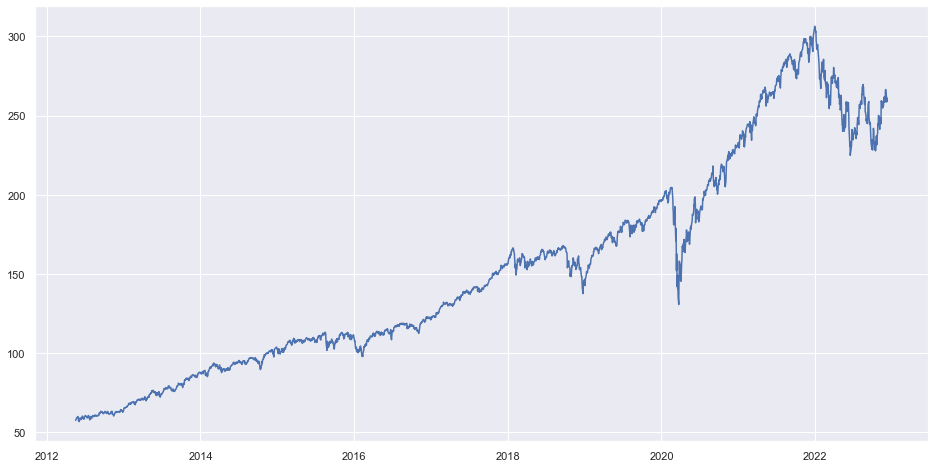

In [18]:
plt.figure(figsize=(16,8))
plt.plot(df_ts);


In [48]:
# resampling weekly/monthly data

df_ts_monthly=df_ts.resample('1W').mean() ## was 1M
df_ts_monthly.head()



Date
2012-05-20    57.474086
2012-05-27    58.965796
2012-06-03    58.573481
2012-06-10    58.027048
2012-06-17    58.524547
Freq: W-SUN, dtype: float64

In [49]:
# v 006
pred_period = 52 ## 1 year prediciton, TODO covid period, 3y might be better

print(df_ts_monthly.shape[0])
df_ts_monthly_save=df_ts_monthly.copy() # needed to compare forecast with realized yield
df_ts_monthly = df_ts_monthly.head(df_ts_monthly.shape[0]-pred_period) # till 2020.02.29, i.e. exclide covid drop and increase
df_ts_monthly.tail()

# TODO -- 552 need to change each and every time to df_ts_monthly.shape

552


Date
2021-11-14    297.317020
2021-11-21    297.260247
2021-11-28    293.893408
2021-12-05    287.720637
2021-12-12    297.141352
Freq: W-SUN, dtype: float64

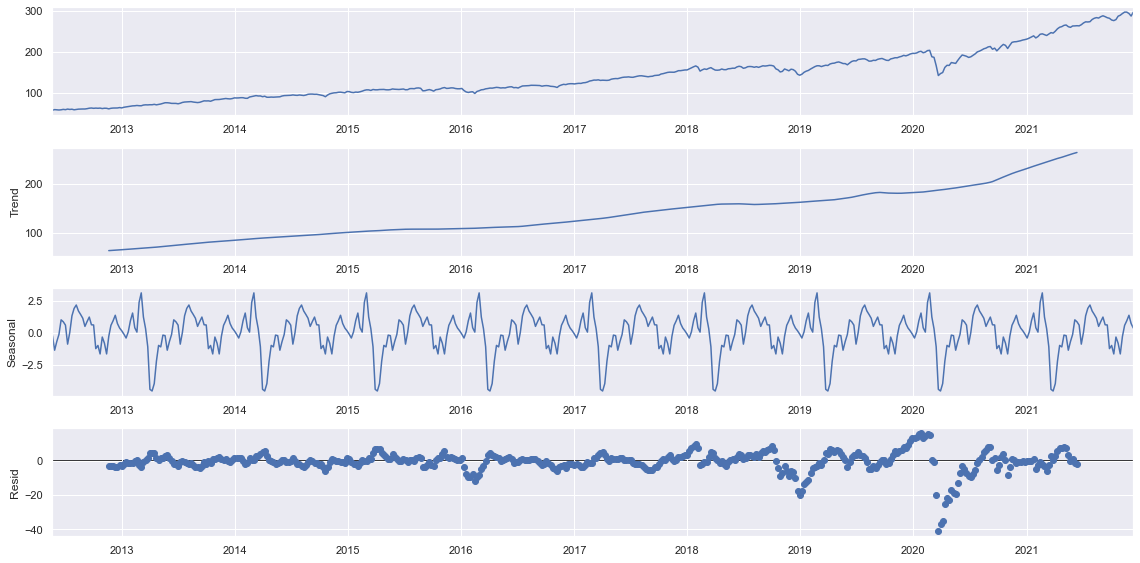

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
tsa =seasonal_decompose(df_ts_monthly)
fig=tsa.plot()
fig.set_size_inches((16, 8))
fig.tight_layout()

plt.show();

In [51]:
## annual cycle is justified

p-value: 0.9154177118137762


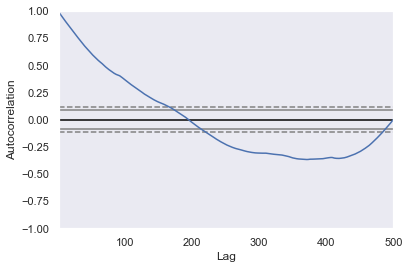

In [52]:
import statsmodels.api as sm

df_ts_monthly_log = np.log(df_ts_monthly) #Log transform


pd.plotting.autocorrelation_plot(df_ts_monthly_log);
res=sm.tsa.stattools.adfuller(df_ts_monthly_log)
print ("p-value:",res[1])

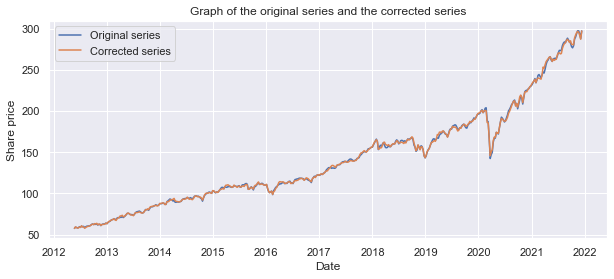

In [53]:
# v006 basic decomp

#plt.plot(df_ts_monthly_log);
tsa =seasonal_decompose(df_ts_monthly_log)

cvs=df_ts_monthly_log- tsa.seasonal

# We go to the exponential to find the original series
x_cvs=np.exp(cvs)

# We display the series
plt.figure(figsize= (10,4))

plt.plot(df_ts_monthly, label='Original series')
plt.plot(x_cvs, label='Corrected series') 

plt.title('Graph of the original series and the corrected series')
plt.xlabel('Date')
plt.ylabel('Share price')
plt.legend();

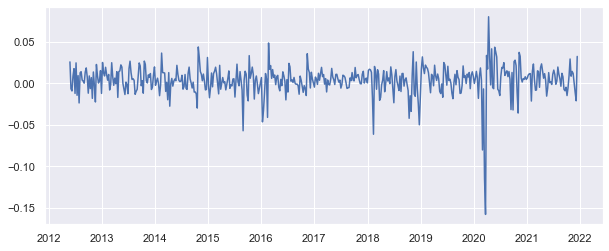

p-value: 1.0613991377985255e-13


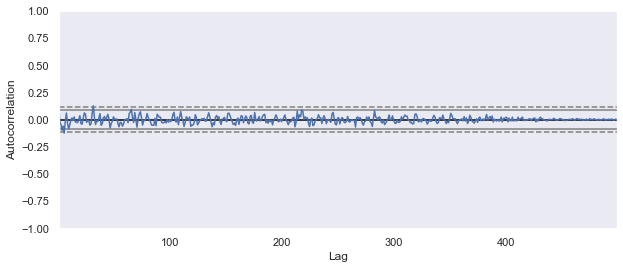

In [54]:
df_ts_monthly_log_1 = df_ts_monthly_log.diff().dropna()

plt.figure(figsize= (10,4))
plt.plot(df_ts_monthly_log_1);
plt.show();

plt.figure(figsize= (10,4))
pd.plotting.autocorrelation_plot(df_ts_monthly_log_1);
res=sm.tsa.stattools.adfuller(df_ts_monthly_log_1)
print ("p-value:",res[1])


In [55]:
# one order difference is sufficient based on the autocorrelation figures

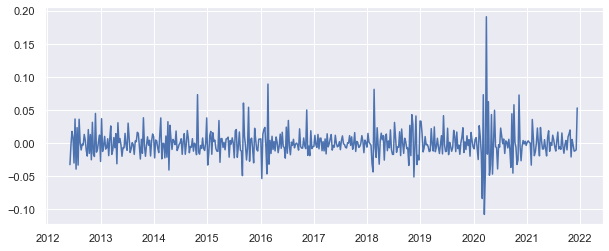

p-value: 1.4081372827302771e-15


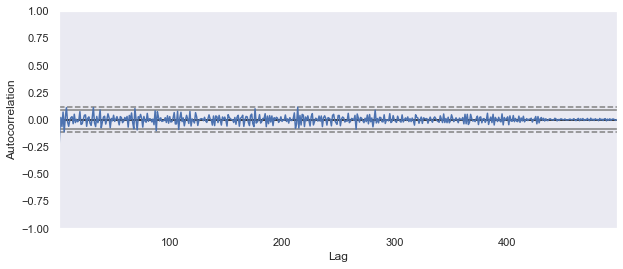

In [56]:
df_ts_monthly_log_2 = df_ts_monthly_log_1.diff().dropna()

plt.figure(figsize= (10,4))
plt.plot(df_ts_monthly_log_2);
plt.show();

plt.figure(figsize= (10,4))
pd.plotting.autocorrelation_plot(df_ts_monthly_log_2);
res=sm.tsa.stattools.adfuller(df_ts_monthly_log_2)
print ("p-value:",res[1])


In [57]:
######################## sarima

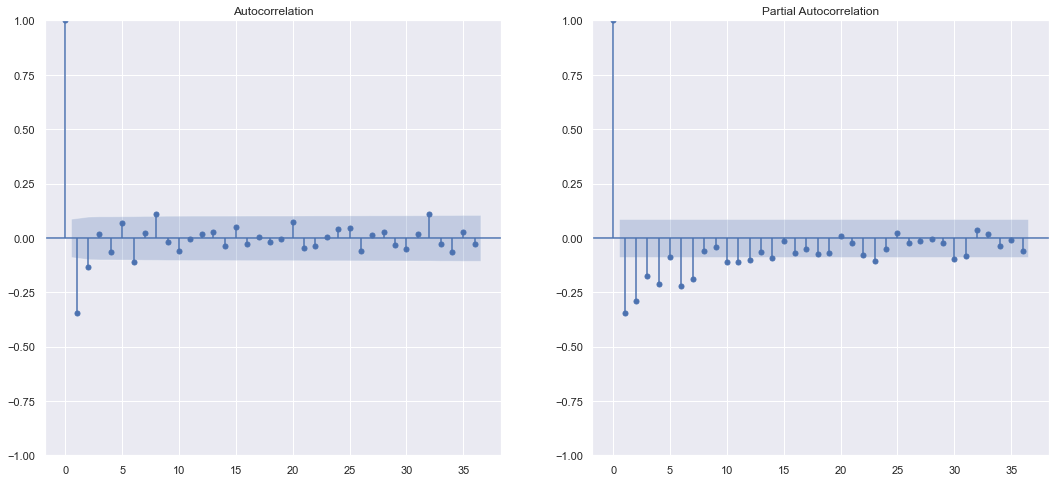

In [58]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))

plot_acf(df_ts_monthly_log_2,lags=36,ax=ax1)  ## was 36 in case on 1M
plot_pacf(df_ts_monthly_log_2,lags=36,ax=ax2) ## was 36 in case on 1M

plt.show();


In [59]:
model_sm = sm.tsa.SARIMAX(df_ts_monthly_log, order=(1,1,1), seasonal_order = (0,1,1,52))  ## 1M: seasonal_order = (0,1,1,12)
# df_ts_monthly_log is used , not diff !!!
# why we need D=1, since no second order diff.

model_sm_fitted = model_sm.fit()

model_sm_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  500
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 52)   Log Likelihood                1123.977
Date:                            Mon, 03 Apr 2023   AIC                          -2239.953
Time:                                    10:35:20   BIC                          -2223.543
Sample:                                05-20-2012   HQIC                         -2233.484
                                     - 12-12-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0538      0.106     -0.505      0.613      -0.263       0.155
ma.L1          0.2745      0.099      2.769      0.006       0.080       0.469
ma.S.L52      -0.8021      0.051    -15.630      0.000      -0.903      -0.702
sigma2         0.0003   1.17e-05     29.092      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2235.22
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.01   Skew:                            -1.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
# ar.L1 is not significant, so removed


In [61]:
model_sm = sm.tsa.SARIMAX(df_ts_monthly_log, order=(0,1,1), seasonal_order = (0,1,1,12)) # df_ts_monthly_log is used , not diff !!!
model_sm_fitted = model_sm.fit()

model_sm_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  500
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                1264.334
Date:                            Mon, 03 Apr 2023   AIC                          -2522.668
Time:                                    10:35:44   BIC                          -2510.103
Sample:                                05-20-2012   HQIC                         -2517.732
                                     - 12-12-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2389      0.017     14.119      0.000       0.206       0.272
ma.S.L12      -0.9810      0.066    -14.931      0.000      -1.110      -0.852
sigma2         0.0003    1.3e-05     23.166      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3763.79
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.78   Skew:                            -1.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
# model parameters and Ljung Box test is ok, but Jarque-Bera is not! 

500


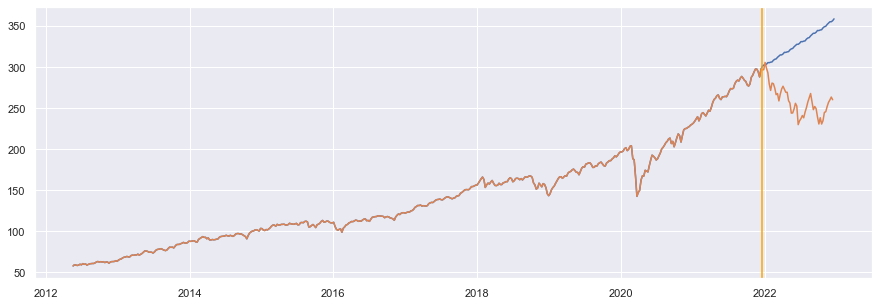

In [65]:
import datetime as dt

print(df_ts_monthly.shape[0])
prediction_log = model_sm_fitted.predict(df_ts_monthly.shape[0], df_ts_monthly.shape[0]+pred_period)
prediction=np.exp(prediction_log)

df_ts_monthly_pred=pd.concat([df_ts_monthly,prediction])

fig, ax = plt.subplots(figsize = (15,5))
plt.plot(df_ts_monthly_pred)
plt.plot(df_ts_monthly_save) # v 006

plt.axvline(x= dt.date(2021,12,15), color='orange');  # TODO: can be automatic

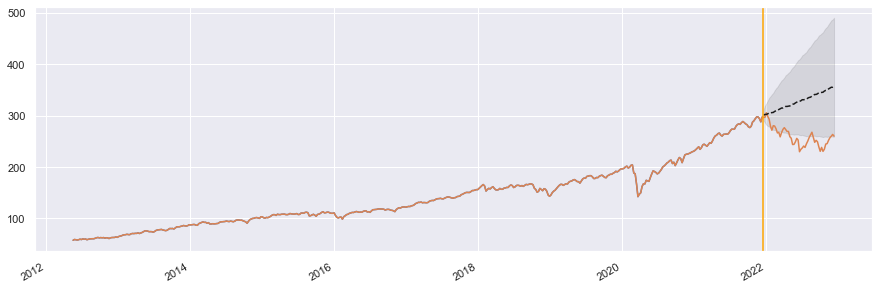

In [66]:
prediction_log = model_sm_fitted.get_forecast(steps =pred_period).summary_frame()  #PForecasting with a confidence interval
prediction=np.exp(prediction_log)

fig, ax = plt.subplots(figsize = (15,5))

plt.plot(df_ts_monthly)
plt.plot(df_ts_monthly_save) # v 006
#plt.ylim(0,300) # v006

prediction['mean'].plot(ax = ax, style = 'k--') # Plotting the mean

ax.fill_between(prediction.index, prediction['mean_ci_lower'], prediction['mean_ci_upper'], color='k', alpha=0.1); #Plotting the confidence interval

plt.axvline(x= dt.date(2021,12,15), color='orange'); 

In [67]:
validation_data=df_ts_monthly_save.tail(pred_period) 

rmse_sm = np.sqrt(np.square(np.subtract(validation_data,prediction['mean'])).mean()) 
print("RMSE of SARIMA prediction is:", rmse_sm)

RMSE of SARIMA prediction is: 75.51729784914728


In [68]:
###################### linear regression 

In [195]:
# try monthly again
df_ts_monthly=df_ts.resample('1M').mean() ## was 1M -- no removal of last 1 year, only later ---
df_ts_monthly.head()

Date
2012-05-31    58.855323
2012-06-30    58.646332
2012-07-31    59.506354
2012-08-31    60.189592
2012-09-30    62.227578
Freq: M, dtype: float64

In [225]:
from sklearn.linear_model import LinearRegression

# convert from time series to PD
df_ts_monthly_lin=pd.DataFrame(df_ts_monthly,index=df_ts_monthly.index)
df_ts_monthly_lin['Time'] = np.arange(len(df_ts_monthly_lin.index))
df_ts_monthly_lin.columns=['Stock','Time']
df_ts_monthly_lin.head()


,Stock,Time
Date,,
2012-05-31,58.855323,0
2012-06-30,58.646332,1
2012-07-31,59.506354,2
2012-08-31,60.189592,3
2012-09-30,62.227578,4


In [226]:
df_ts_monthly_lin['Month'] = df_ts_monthly_lin.index.month
df_ts_monthly_lin['Year'] = df_ts_monthly_lin.index.month
for i in range(12,18,1):
    df_ts_monthly_lin['Lag_'+str(i)] = df_ts_monthly_lin.Stock.shift(i)

df_ts_monthly_lin['Lag_24'] = df_ts_monthly_lin.Stock.shift(24)

df_ts_monthly_lin.head(36).tail(12)

,Stock,Time,Month,Year,Lag_12,Lag_13,Lag_14,Lag_15,Lag_16,Lag_17,Lag_24
Date,,,,,,,,,,,
2014-05-31,90.376752,24,5,5,74.922957,71.346876,70.436002,68.551975,66.454264,63.220390,58.855323
2014-06-30,93.630713,25,6,6,73.966207,74.922957,71.346876,70.436002,68.551975,66.454264,58.646332
2014-07-31,94.397970,26,7,7,76.822403,73.966207,74.922957,71.346876,70.436002,68.551975,59.506354
2014-08-31,95.250599,27,8,8,77.390749,76.822403,73.966207,74.922957,71.346876,70.436002,60.189592
2014-09-30,96.171061,28,9,9,79.186333,77.390749,76.822403,73.966207,74.922957,71.346876,62.227578
2014-10-31,93.958556,29,10,10,81.690377,79.186333,77.390749,76.822403,73.966207,74.922957,62.268235
2014-11-30,100.020543,30,11,11,84.758114,81.690377,79.186333,77.390749,76.822403,73.966207,62.059870
2014-12-31,101.569178,31,12,12,86.128116,84.758114,81.690377,79.186333,77.390749,76.822403,63.220390
2015-01-31,101.277318,32,1,1,87.567399,86.128116,84.758114,81.690377,79.186333,77.390749,66.454264


In [227]:
horizons = 12 # TODO needs to be aligned with above
split_point = df_ts_monthly_lin.shape[0] - horizons
train, test = df_ts_monthly_lin[24:split_point],df_ts_monthly_lin[split_point:] # 24 depends on LAGs used

In [228]:
X_train = train[df_ts_monthly_lin.columns[2:]] ## TODO: 2 is used because Time column is there, otherwise 1
y_train = train['Stock']
X_test = test[df_ts_monthly_lin.columns[2:]] ## TODO: 2 is used because Time column is there, otherwise 1
y_test = test['Stock']


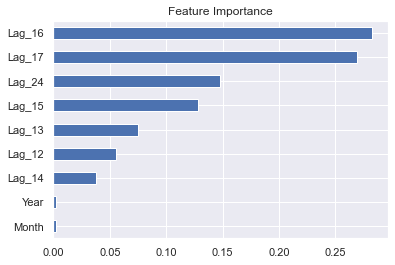

In [229]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).sort_values().plot(kind='barh', title='Feature Importance');

MSE = 1144.81


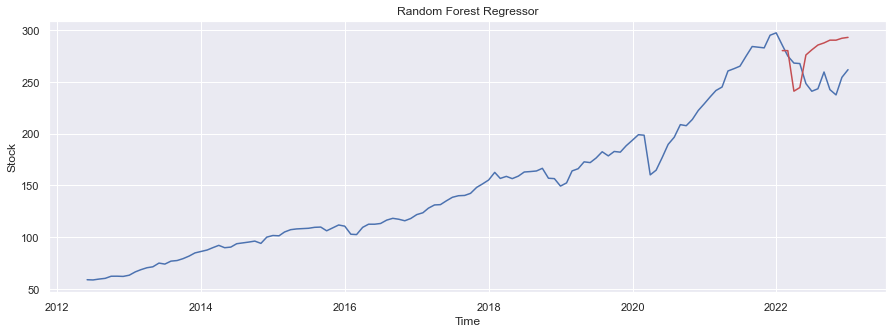

In [230]:
from sklearn.metrics import mean_squared_error

perf_summary=dict()

MSE = mean_squared_error(y_test, y_pred)
print("MSE = %.2f"%MSE)
perf_summary['RF 1 model lag 12'] = MSE

fig, ax = plt.subplots(figsize = (15,5))

plt.plot(df_ts_monthly_lin.index, df_ts_monthly_lin.Stock, c='b', label='Historical data')
plt.plot(X_test.index, y_pred, c='r', label='Random Forest Regressor')

plt.xlabel('Time')
plt.ylabel('Stock')
plt.title('Random Forest Regressor')
plt.show()

In [231]:
forecast = np.mean(train['Stock'][-24:]) # 24or 36 depending on LAG
y_pred_mean = np.ones(12,)*forecast
y_pred_mean

array([233.11992579, 233.11992579, 233.11992579, 233.11992579,
       233.11992579, 233.11992579, 233.11992579, 233.11992579,
       233.11992579, 233.11992579, 233.11992579, 233.11992579])

MSE benchmark naive= 781.07
MSE RF= 1144.81


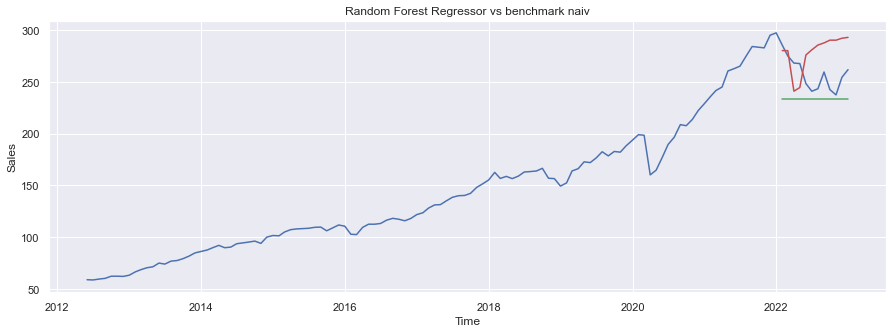

In [232]:
MSE = mean_squared_error(y_test, y_pred_mean)
print("MSE benchmark naive= %.2f"%MSE)
perf_summary['Naive mean 36 months'] = MSE

MSE = mean_squared_error(y_test, y_pred)
print("MSE RF= %.2f"%MSE)

fig, ax = plt.subplots(figsize = (15,5))

plt.plot(df_ts_monthly_lin.index, df_ts_monthly_lin.Stock, c='b', label='Historical data')
plt.plot(X_test.index, y_pred, c='r', label='Random Forest Regressor')
plt.plot(X_test.index, y_pred_mean, c='g', label='Benchmark based on 36 month')

plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Random Forest Regressor vs benchmark naiv')
plt.show()

In [233]:
y_pred_seas = train['Stock'][-12:]
y_pred_seas

Date
2021-01-31    235.798751
2021-02-28    241.639661
2021-03-31    244.992507
2021-04-30    260.508962
2021-05-31    262.746312
2021-06-30    265.153959
2021-07-31    274.817517
2021-08-31    284.131799
2021-09-30    283.497211
2021-10-31    282.819982
2021-11-30    295.033238
2021-12-31    297.319979
Freq: M, Name: Stock, dtype: float64

MSE benchmark seasonal naive= 1101.12
MSE RF= 1144.81


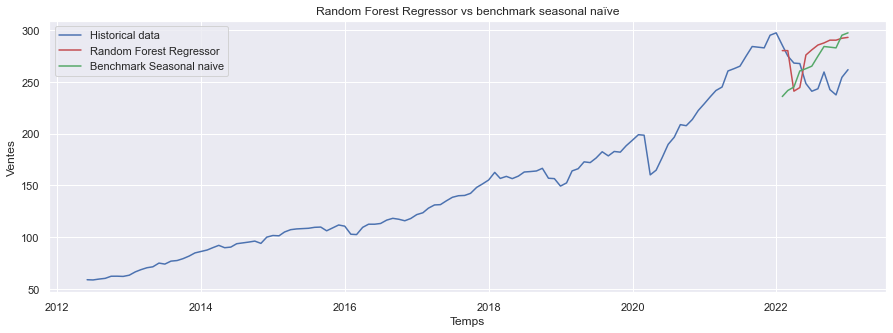

In [234]:
MSE = mean_squared_error(y_test, y_pred_seas)
print("MSE benchmark seasonal naive= %.2f"%MSE)
perf_summary['Seasonal naive'] = MSE

MSE = mean_squared_error(y_test, y_pred)
print("MSE RF= %.2f"%MSE)

fig, ax = plt.subplots(figsize = (15,5))

plt.plot(df_ts_monthly_lin.index, df_ts_monthly_lin.Stock, c='b', label='Historical data')
plt.plot(X_test.index, y_pred, c='r', label='Random Forest Regressor')
plt.plot(X_test.index, y_pred_seas, c='g', label='Benchmark Seasonal naive')

plt.xlabel('Temps')
plt.ylabel('Ventes')
plt.title('Random Forest Regressor vs benchmark seasonal naïve')
plt.legend()
plt.show()

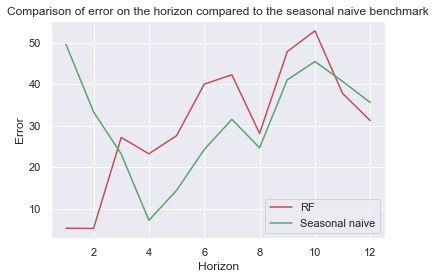

In [235]:
plt.plot(np.arange(1,13,1), np.abs(df_ts_monthly_lin.Stock[-12:].values-y_pred[-12:]), c='r', label='RF')
plt.plot(np.arange(1,13,1), np.abs(df_ts_monthly_lin.Stock[-12:].values-y_pred_seas), c='g', label='Seasonal naive')

plt.xlabel('Horizon')
plt.ylabel('Error')
plt.title("Comparison of error on the horizon compared to the seasonal naive benchmark")
plt.legend()
plt.show()

In [236]:
# direct approach
for i in range(1,12,1):
    df_ts_monthly_lin['Lag_'+str(i)] = df_ts_monthly_lin.Stock.shift(i)


In [237]:
horizons = 12
cutoff_index = df_ts_monthly_lin.shape[0]-horizons

predictions = []
pred_index = []
y_true = []
for h in np.arange(1,horizons+1,1):

  train, test = df_ts_monthly_lin[24:cutoff_index], df_ts_monthly_lin[cutoff_index:cutoff_index+h]
  if h != 1:
    print("Horizon: ", h)
    print("Columns: ", df_ts_monthly_lin.columns[1:-h+1])
    print("")
    X_train = train[df_ts_monthly_lin.columns[1:-h+1]]
    X_test = test[df_ts_monthly_lin.columns[1:-h+1]]
  else : 
    print("Horizon: ", h)
    print("Columns: ", df_ts_monthly_lin.columns[1:])
    X_train = train[df_ts_monthly_lin.columns[1:]]
    X_test = test[df_ts_monthly_lin.columns[1:]]

  y_train = train['Stock']
  y_test = test['Stock']

  model = RandomForestRegressor(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  predictions.append(y_pred[h-1])
  pred_index.append(X_test.index[h-1])
  y_true.append(y_test[h-1])

MSE = mean_squared_error(y_true, predictions)
print("MSE = %.2f"%MSE)
perf_summary['RF Direct Approach - 12 models'] = MSE


Horizon:  1
Columns:  Index(['Time', 'Month', 'Year', 'Lag_12', 'Lag_13', 'Lag_14', 'Lag_15',
       'Lag_16', 'Lag_17', 'Lag_24', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4',
       'Lag_5', 'Lag_6', 'Lag_7', 'Lag_8', 'Lag_9', 'Lag_10', 'Lag_11'],
      dtype='object')
Horizon:  2
Columns:  Index(['Time', 'Month', 'Year', 'Lag_12', 'Lag_13', 'Lag_14', 'Lag_15',
       'Lag_16', 'Lag_17', 'Lag_24', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4',
       'Lag_5', 'Lag_6', 'Lag_7', 'Lag_8', 'Lag_9', 'Lag_10'],
      dtype='object')

Horizon:  3
Columns:  Index(['Time', 'Month', 'Year', 'Lag_12', 'Lag_13', 'Lag_14', 'Lag_15',
       'Lag_16', 'Lag_17', 'Lag_24', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4',
       'Lag_5', 'Lag_6', 'Lag_7', 'Lag_8', 'Lag_9'],
      dtype='object')

Horizon:  4
Columns:  Index(['Time', 'Month', 'Year', 'Lag_12', 'Lag_13', 'Lag_14', 'Lag_15',
       'Lag_16', 'Lag_17', 'Lag_24', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4',
       'Lag_5', 'Lag_6', 'Lag_7', 'Lag_8'],
      dtype='object')

Horizon:

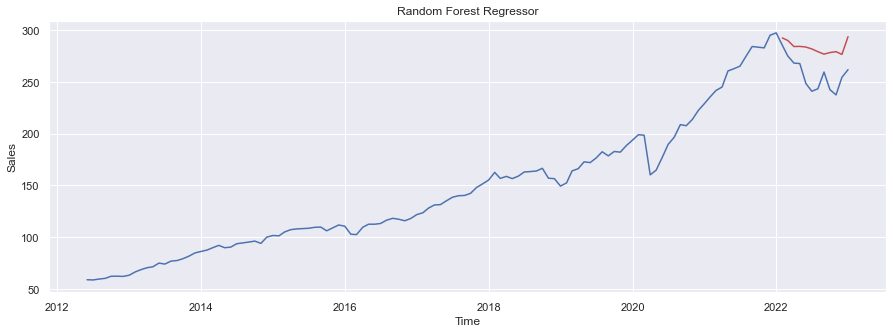

In [238]:
fig, ax = plt.subplots(figsize = (15,5))

plt.plot(df_ts_monthly_lin.index, df_ts_monthly_lin.Stock, c='b', label='Historical data')
plt.plot(pred_index, predictions, c='r', label='Random Forest Regressor')

plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Random Forest Regressor')
plt.show()

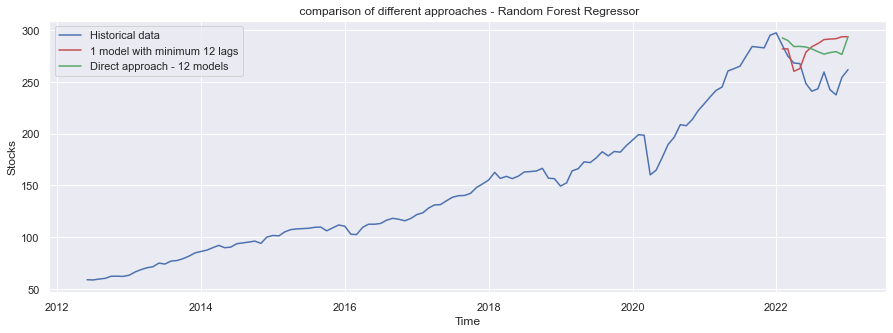

In [239]:
fig, ax = plt.subplots(figsize = (15,5))

plt.plot(df_ts_monthly_lin.index, df_ts_monthly_lin.Stock, c='b', label='Historical data')
plt.plot(X_test.index, y_pred, c='r', label='1 model with minimum 12 lags')
plt.plot(pred_index, predictions, c='g', label='Direct approach - 12 models')

plt.xlabel('Time')
plt.ylabel('Stocks')
plt.title(' comparison of different approaches - Random Forest Regressor')
plt.legend()
plt.show()

In [240]:
## from here -- old version, cleaned

In [241]:

X=df_ts_monthly_lin.loc[:, ['Time']] 
y=df_ts_monthly_lin.loc[:, ['Stock']] 

In [242]:
model_lin = LinearRegression()
model_lin.fit(X, y)



LinearRegression()

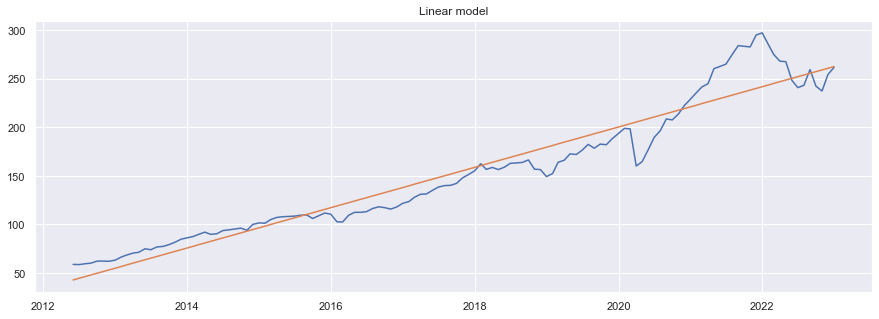

In [243]:
y_pred = pd.DataFrame(model_lin.predict(X), index=X.index, columns=['BLK linear fit'])

fig, ax = plt.subplots(figsize = (15,5))
plt.plot(y)
plt.plot(y_pred)

ax.set_title('Linear model');

In [244]:
# not needed anymore, lags has already been created earlier

###df_ts_monthly_lin['Lag_1'] = df_ts_monthly_lin['BLK'].shift(1)
##df_ts_monthly_lin['Lag_1'] = df_ts_monthly_lin[[0]].shift(1)
##df_ts_monthly_lin.head()

In [246]:
X = df_ts_monthly_lin.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
##y = df_ts_monthly_lin.loc[:, 'BLK']  # create the target
y = df_ts_monthly_lin.loc[:, 'Stock']  # create the target

y, X = y.align(X, join='inner')  # drop corresponding values in target

model_lin = LinearRegression()
model_lin.fit(X, y)

##y_pred = pd.DataFrame(model_lin.predict(X), index=X.index, columns=['BLK lag'] )
y_pred = pd.DataFrame(model_lin.predict(X), index=X.index, columns=['lag'] )

y_pred

,lag
Date,
2012-06-30,60.635243
2012-07-31,60.426661
2012-08-31,61.284997
2012-09-30,61.966897
2012-10-31,64.000890
...,...
2022-08-31,244.736672
2022-09-30,260.893146
2022-10-31,243.889232


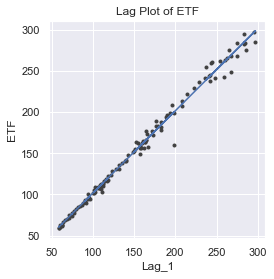

In [247]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
##ax.plot(X['Lag_1'], y_pred['BLK lag'])
ax.plot(X['Lag_1'], y_pred['lag'])


ax.set_aspect('equal')
##ax.set_ylabel('BLK')
ax.set_ylabel('ETF')
ax.set_xlabel('Lag_1')
##ax.set_title('Lag Plot of BLK');
ax.set_title('Lag Plot of ETF');

In [78]:
df_ts_monthly_lin_save.tail()

,0,Time,Lag_1
Date,,,
2022-11-13,251.643406,547,245.318221
2022-11-20,256.743609,548,251.643406
2022-11-27,259.717726,549,256.743609
2022-12-04,263.203578,550,259.717726
2022-12-11,259.918663,551,263.203578


In [ ]:
############### Prophet

In [248]:
import prophet as pt

In [249]:
df_ts_monthly_lin.head()

,Stock,Time,Month,Year,Lag_12,Lag_13,Lag_14,Lag_15,Lag_16,Lag_17,...,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-31,58.855323,0,5,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-30,58.646332,1,6,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-31,59.506354,2,7,7,NaN,NaN,NaN,NaN,NaN,NaN,...,58.855323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-08-31,60.189592,3,8,8,NaN,NaN,NaN,NaN,NaN,NaN,...,58.646332,58.855323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-30,62.227578,4,9,9,NaN,NaN,NaN,NaN,NaN,NaN,...,59.506354,58.646332,58.855323,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
##df_ts_monthly_pt=df_ts_monthly_lin.rename(columns={'BLK': 'y'})
df_ts_monthly_pt=df_ts_monthly_lin.rename(columns={'Stock': 'y'})

df_ts_monthly_pt=df_ts_monthly_pt.drop(df_ts_monthly_pt.columns[1:],axis=1)
df_ts_monthly_pt['ds']=df_ts_monthly_pt.index

df_ts_monthly_pt.head()

,y,ds
Date,,
2012-05-31,58.855323,2012-05-31
2012-06-30,58.646332,2012-06-30
2012-07-31,59.506354,2012-07-31
2012-08-31,60.189592,2012-08-31
2012-09-30,62.227578,2012-09-30


In [263]:
horizons = 12 # TODO needs to be aligned with above

split_point = df_ts_monthly_pt.shape[0] - horizons
train, test = df_ts_monthly_pt[24:split_point],df_ts_monthly_pt[split_point:] # 24 depends on LAGs used

train.tail()

,y,ds
Date,,
2021-08-31,284.131799,2021-08-31
2021-09-30,283.497211,2021-09-30
2021-10-31,282.819982,2021-10-31
2021-11-30,295.033238,2021-11-30
2021-12-31,297.319979,2021-12-31


In [264]:
model_pt = pt.Prophet(interval_width=0.95)
model_pt.fit(train)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [266]:
future_dates = model_pt.make_future_dataframe(periods=horizons, freq='MS') 
future_dates.tail()

,ds
99,2022-08-01
100,2022-09-01
101,2022-10-01
102,2022-11-01
103,2022-12-01


In [267]:
forecast = model_pt.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-05-31,91.481300,78.695129,103.835591
1,2014-06-30,93.825068,80.795287,105.160776
2,2014-07-31,96.275237,84.575147,108.966146
3,2014-08-31,96.598246,84.641943,109.037335
4,2014-09-30,96.578763,84.285457,109.425072


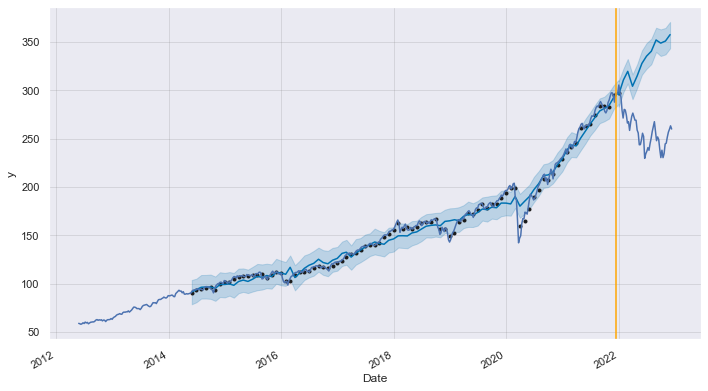

In [269]:
model_pt.plot(forecast, uncertainty=True)

ax = y_save.plot()
plt.axvline(x= dt.date(2021,12,15), color='orange'); 

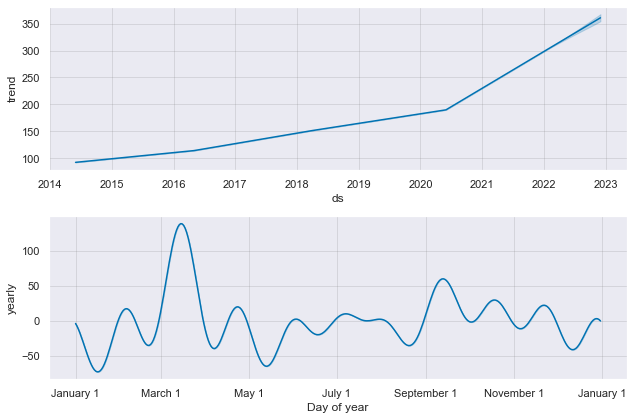

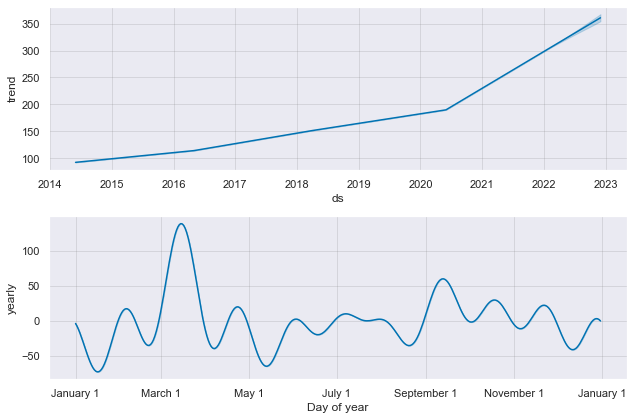

In [270]:
model_pt.plot_components(forecast)


In [284]:
rmse_pt =  np.sqrt(mean_squared_error(test['y'], forecast.trend.tail(horizons)))
print("RMSE of Prophet prediction is:", rmse_pt)


RMSE of Prophet prediction is: 78.82942296437412
